Lambda School Data Science

*Unit 4, Sprint 1, Module 3*

---

# Document Classification (Assignment)

This notebook is for you to practice skills during lecture.

Today's guided module project and assignment will be different. You already know how to do classification. You ready know how to extract features from documents. So? That means you're ready to combine and practice those skills in a kaggle competition. We we will open with a five minute sprint explaining the competition, and then give you 25 minutes to work. After those twenty five minutes are up, I will give a 5-minute demo an NLP technique that will help you with document classification (*and **maybe** the competition*).

Today's all about having fun and practicing your skills.

## Sections
* <a href="#p1">Part 1</a>: Text Feature Extraction & Classification Pipelines
* <a href="#p2">Part 2</a>: Latent Semantic Indexing
* <a href="#p3">Part 3</a>: Word Embeddings with Spacy
* <a href="#p4">Part 4</a>: Post Lecture Assignment

# Text Feature Extraction & Classification Pipelines (Learn)
<a id="p1"></a>

## Follow Along 

What you should be doing now:
1. Join the Kaggle Competition
2. Download the data
3. Train a model (try using the pipe method I just demoed)

# Imports

In [105]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD, PCA

import seaborn as sns

### Load Competition Data

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.shape

(4087, 3)

In [4]:
train.head()

,id,description,ratingCategory
0,1321,"\nSometimes, when whisky is batched, a few lef...",1
1,3861,\nAn uncommon exclusive bottling of a 6 year o...,0
2,655,\nThis release is a port version of Amrut’s In...,1
3,555,\nThis 41 year old single cask was aged in a s...,1
4,1965,"\nQuite herbal on the nose, with aromas of dri...",1


In [5]:
test.head()

,id,description
0,3461,\nStyle: Speyside single malt scotch Color: Wa...
1,2604,"\nVery bright and lively, with a nice balance ..."
2,3341,\nA new oloroso-forward Chivas positioned to s...
3,3764,\nAged in bourbon casks and then enhanced in R...
4,2306,\nThere is a freshness to the wood on the nose...


<AxesSubplot:xlabel='ratingCategory'>

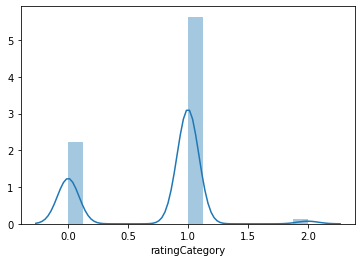

In [6]:
sns.distplot(train.ratingCategory)

# TTS

In [7]:
# X_train, X_val, y_train, y_val = train_test_split(
#     train.description, 
#     train.ratingCategory, 
#     test_size=0.3,
#     random_state=42)

### Define Pipeline Components

In [17]:
vect = TfidfVectorizer().
clf = LogisticRegression(n_jobs=-1, random_state=42)

log_pipe = make_pipeline(vect, clf)

In [22]:
log_pipe.fit(train.description, train.ratingCategory);

In [23]:
forest_pipe = make_pipeline(vect, RandomForestClassifier(n_jobs=-1, random_state=42));

In [24]:
forest_pipe.fit(train.description, train.ratingCategory);

In [33]:
print(f"Log Train accuracy: {log_pipe.score(X_train, y_train)}")
print(f"Forest Train accuracy: {forest_pipe.score(train.description, train.ratingCategory)}")

Log Train accuracy: 0.8723776223776224
Forest Train accuracy: 0.9997553217518963


### Define Your Search Space
You're looking for both the best hyperparameters of your vectorizer and your classification model. 

In [48]:
parameters = {
    'tfidfvectorizer__max_df': (0.75, 1.0),
    'randomforestclassifier__max_depth':(5,10,15,20)
}

grid_search = GridSearchCV(forest_pipe,parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(train.description, train.ratingCategory);

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    3.0s finished


In [49]:
grid_search.best_score_

0.7095680721106798

In [41]:
parameters = {
    'tfidfvectorizer__max_df': (0.75, 1.0),
    "tfidfvectorizer__min_df": (.05,.1,.2),
    'logisticregression__penalty':("l1", "l2"),
    "logisticregression__class_weight": (None, "balanced")
}

log_grid = GridSearchCV(log_pipe,parameters, cv=5, n_jobs=-1, verbose=1)
log_grid.fit(train.description, train.ratingCategory);

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    3.6s finished


In [42]:
log_grid.best_score_

0.7291477257423995

### Make a Submission File
*Note:* In a typical Kaggle competition, you are only allowed two submissions a day, so you only submit if you feel you cannot achieve higher test accuracy. For this competition the max daily submissions are capped at **20**. Submit for each demo and for your assignment. 

In [43]:
# Predictions on test sample
#pred = grid_search.predict(test['description'])
pred = log_grid.predict(test['description'])

In [44]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [45]:
# Make Sure the Category is an Integer
submission.head()

,id,ratingCategory
0,3461,1
1,2604,1
2,3341,1
3,3764,1
4,2306,1


In [46]:
subNumber

2

In [47]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./data/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

You're trying to achieve a minimum of 70% Accuracy on your model.

## Latent Semantic Indexing (Learn)
<a id="p2"></a>

## Follow Along
1. Join the Kaggle Competition
2. Download the data
3. Train a model & try: 
    - Creating a Text Extraction & Classification Pipeline
    - Tune the pipeline with a `GridSearchCV` or `RandomizedSearchCV`
    - Add some Latent Semantic Indexing (lsi) into your pipeline. *Note:* You can grid search a nested pipeline, but you have to use double underscores ie `lsi__svd__n_components`
4. Make a submission to Kaggle 


In [57]:
len(forest_pipe['tfidfvectorizer'].get_feature_names())

12974

In [58]:
grid_search.best_params_

{'randomforestclassifier__max_depth': 20, 'tfidfvectorizer__max_df': 1.0}

### Define Pipeline Components

In [68]:
lsi = TruncatedSVD(random_state=42)

lsi_pipe = make_pipeline(vect, lsi, RandomForestClassifier(n_jobs=-1, random_state=42))

### Define Your Search Space
You're looking for both the best hyperparameters of your vectorizer and your classification model. 

In [69]:
parameters = {
    'truncatedsvd__n_components': [10,100,250],
    'tfidfvectorizer__max_df': (0.75, 1.0),
    'randomforestclassifier__max_depth':(5,10,15,20)
}

lsi_grid = GridSearchCV(lsi_pipe,parameters, cv=3, n_jobs=-1, verbose=1)
lsi_grid.fit(train.description, train.ratingCategory);

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   17.1s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidfvectorizer',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                               

In [70]:
lsi_grid.best_score_

0.7296325983288856

### Make a Submission File

In [71]:
# Predictions on test sample
pred = lsi_grid.predict(test['description'])

In [72]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [73]:
# Make Sure the Category is an Integer
submission.head()

,id,ratingCategory
0,3461,1
1,2604,1
2,3341,1
3,3764,1
4,2306,1


In [74]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./data/submission{subNumber}.csv', index=False)
subNumber += 1

In [75]:
from sklearn.linear_model import SGDClassifier

In [87]:
sgd_pipe = make_pipeline(vect, lsi, SGDClassifier(n_jobs=-1, random_state=42));

In [89]:
params = {
    'truncatedsvd__n_components': [10,100,250,500],
    'tfidfvectorizer__max_df': (0.7,.85,1.0),
    "sgdclassifier__loss": ("log", "modified_huber", "hinge"),
    "sgdclassifier__class_weight": (None, "balanced")
}
sgd_grid = GridSearchCV(sgd_pipe,params, cv=3, n_jobs=-1, verbose=1)
sgd_grid.fit(train.description, train.ratingCategory);

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  1.4min finished


In [90]:
sgd_grid.best_score_

0.755079079324961

In [91]:
pred = sgd_grid.predict(test['description'])
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')
submission.to_csv(f'./data/submission{subNumber}.csv', index=False)
subNumber += 1

In [92]:
subNumber

6

## Challenge

Continue to apply Latent Semantic Indexing (LSI) to various datasets. 

# Word Embeddings with Spacy (Learn)
<a id="p3"></a>

In [93]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [97]:
embed_df = pd.DataFrame([nlp(i).vector for i in train.description])

In [98]:
embed_df.shape

(4087, 300)

# I want to try with and without pca, all the classifiers, no need for tfidf or lsi

## Log with embed

In [101]:
log = LogisticRegression(n_jobs=-1, random_state=42)
log.fit(embed_df, train.ratingCategory);

In [102]:
log.score(embed_df, train.ratingCategory)

0.7658429165647174

In [104]:
pred = log.predict(pd.DataFrame([nlp(i).vector for i in test.description]))
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')
submission.to_csv(f'./data/embed_log.csv', index=False)

In [107]:
pca_pipe = make_pipeline(PCA(random_state=42), LogisticRegression(n_jobs=-1, random_state=42));

In [108]:
params = {
    "pca__n_components": (10, 50, 100, 150, 200, 250, 300)
}
pca_grid = GridSearchCV(pca_pipe,params, cv=3, n_jobs=-1, verbose=1)
pca_grid.fit(embed_df, train.ratingCategory);

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed:    1.6s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    1.8s finished


In [109]:
pca_grid.best_score_

0.7440690955175394

In [111]:
pred = pca_grid.predict(pd.DataFrame([nlp(i).vector for i in test.description]))
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')
submission.to_csv(f'./data/embed_pca.csv', index=False)

## Follow Along

In [162]:
#from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
# import numpy as np
# from scipy.stats import randint

# param_dist = {
#     'max_depth' : range(3, 11),
#     'min_samples_leaf': range(2,16),
#     # 'pca__n_components': (10, 50, 100, 150, 200, 250, 300),
# }
# grad_grid = GridSearchCV(GradientBoostingClassifier(random_state=42),param_dist, cv=3, n_jobs=-1, verbose=1)
# grad_grid.fit(embed_df, train.ratingCategory);

In [163]:
grad = GradientBoostingClassifier(random_state=42)
grad.fit(embed_df, train.ratingCategory);

In [164]:
grad.score(embed_df, train.ratingCategory)

0.8852459016393442

### Make a Submission File

In [165]:
pred = grad.predict([nlp(i).vector for i in test.description])

In [166]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')
submission.to_csv(f'./data/grad.csv', index=False)

## Challenge

What you should be doing now:
1. Join the Kaggle Competition
2. Download the data
3. Train a model & try: 
    - Creating a Text Extraction & Classification Pipeline
    - Tune the pipeline with a `GridSearchCV` or `RandomizedSearchCV`
    - Add some Latent Semantic Indexing (lsi) into your pipeline. *Note:* You can grid search a nested pipeline, but you have to use double underscores ie `lsi__svd__n_components`
    - Try to extract word embeddings with Spacy and use those embeddings as your features for a classification model.
4. Make a submission to Kaggle 

# Post Lecture Assignment
<a id="p4"></a>

Your primary assignment this afternoon is to achieve a minimum of 70% accuracy on the Kaggle competition. Once you have achieved 70% accuracy, please work on the following: 

1. Research "Sentiment Analysis". Provide answers in markdown to the following questions: 
    - What is "Sentiment Analysis"? 
    - Is Document Classification different than "Sentiment Analysis"? Provide evidence for your response
    - How do create labeled sentiment data? Are those labels really sentiment?
    - What are common applications of sentiment analysis?
2. Research our why word embeddings worked better for the lecture notebook than on the whiskey competition.
    - This [text classification documentation](https://developers.google.com/machine-learning/guides/text-classification/step-2-5) from Google might be of interest
    - Neural Networks are becoming more popular for document classification. Why is that the case?